In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams

params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
env = JaywalkEnv(params)

In [3]:
from src.agents.acer.acer_agent import ACERAgent

import torch
import numpy as np

torch.manual_seed(101)
np.random.seed(101)

training_results = []

for replay in [3, 4, 5]:
    for lr in [3e-4, 3e-5]:
        train_parameters = {
            "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
            "action_dim": 3,
            "action_space": [0, 1, 2],
            "hidden_dim": 64,
            "gamma": 0.99,
            "episodes": 10_000,
            "learning_rate": lr,
            "timeout": 200,
            "device": "cpu",
            "kl_beta": 0.01,
            "replay_ratio": replay,
            "clip": 10,
            "replay_buffer_size": 200,
            "early_stop": 100,
        }

        agent = ACERAgent(env, train_parameters)
        result = agent.train(train_parameters["episodes"])

        filename = (
            f"../checkpoints/acer_hyperparameter/acer_replay_{replay}_lr_{lr:.0e}.pt"
        )
        agent.save(filename)

        training_results.append(result)

        del agent

Training: 100%|██████████| 10000/10000 [03:28<00:00, 48.01episode/s, average_return=57.2] 


Model and optimizer successfully saved to ../checkpoints/acer_hyperparameter/acer_replay_3_lr_3e-04.pt


Training:   3%|▎         | 295/10000 [02:09<1:10:49,  2.28episode/s, average_return=-86.6]


Model and optimizer successfully saved to ../checkpoints/acer_hyperparameter/acer_replay_3_lr_3e-05.pt


Training:   2%|▏         | 240/10000 [02:13<1:30:13,  1.80episode/s, average_return=-86.6]


Model and optimizer successfully saved to ../checkpoints/acer_hyperparameter/acer_replay_4_lr_3e-04.pt


Training:   3%|▎         | 287/10000 [02:51<1:36:38,  1.68episode/s, average_return=-86.6]


Model and optimizer successfully saved to ../checkpoints/acer_hyperparameter/acer_replay_4_lr_3e-05.pt


Training: 100%|██████████| 10000/10000 [06:05<00:00, 27.38episode/s, average_return=83.1]  


Model and optimizer successfully saved to ../checkpoints/acer_hyperparameter/acer_replay_5_lr_3e-04.pt


Training: 100%|██████████| 10000/10000 [07:57<00:00, 20.93episode/s, average_return=28.1]   


Model and optimizer successfully saved to ../checkpoints/acer_hyperparameter/acer_replay_5_lr_3e-05.pt


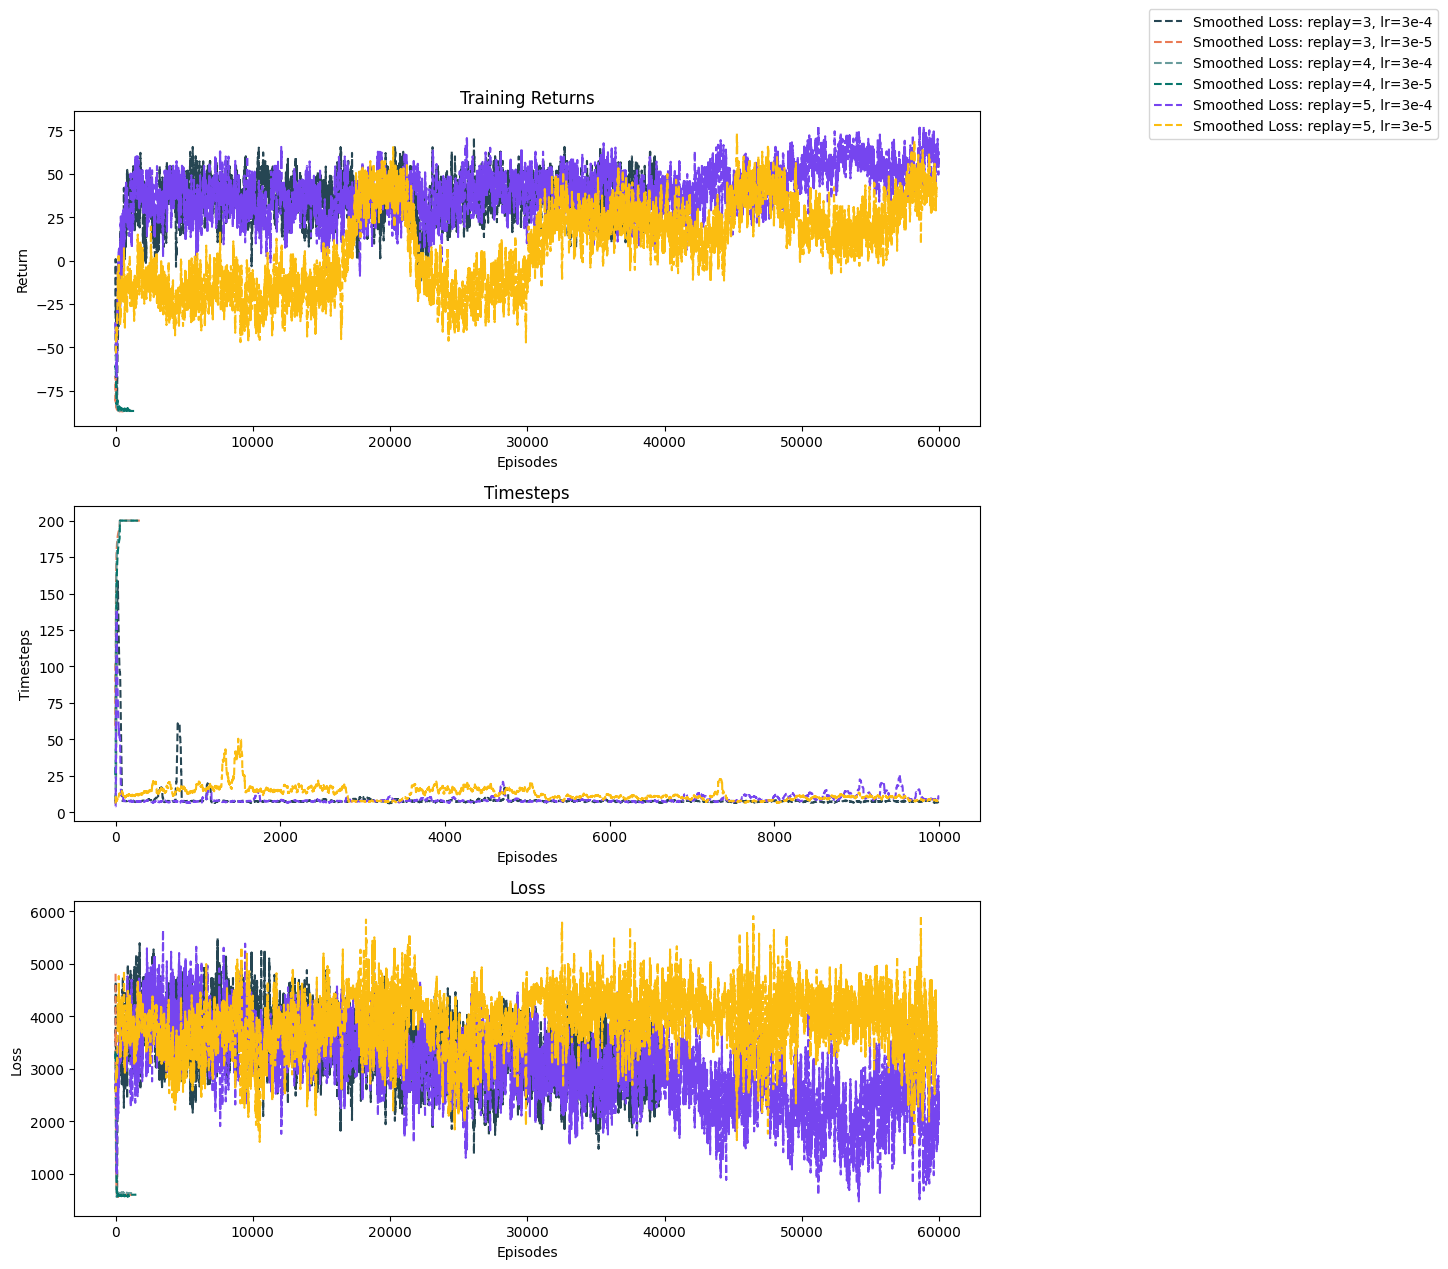

In [4]:
ACERAgent.plot_multiple_training_result(
    training_results=training_results,
    hyperparams=[
        "replay=3, lr=3e-4",
        "replay=3, lr=3e-5",
        "replay=4, lr=3e-4",
        "replay=4, lr=3e-5",
        "replay=5, lr=3e-4",
        "replay=5, lr=3e-5",
    ],
)